In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#load the raw data file
df = pd.read_excel("WDIEXCEL.xlsx", sheet_name = "Data")

In [3]:
#sample the data
df.sample(20)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
261780,Mozambique,MOZ,Proportion of population pushed below the $1.9...,SH.UHC.NOP1.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110473,Bulgaria,BGR,"Population ages 55-59, female (% of female pop...",SP.POP.5559.FE.5Y,5.077314,5.196682,5.320589,5.442504,5.553251,5.644602,...,7.227452e+00,7.157294e+00,7.102397e+00,7.044339e+00,6.974788e+00,6.898774e+00,6.822720e+00,6.752602e+00,6.695411,NaN
25619,IDA blend,IDB,Proportion of people living below 50 percent o...,SI.DST.50MD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297412,Qatar,QAT,Methane emissions in energy sector (thousand m...,EN.ATM.METH.EG.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127904,China,CHN,"Revenue, excluding grants (current LCU)",GC.REV.XGRT.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.483826e+12,5.999220e+12,6.496645e+12,1.018000e+13,1.105137e+13,1.166610e+13,1.321537e+13,NaN,NaN,NaN
251495,Mexico,MEX,"Nurses and midwives (per 1,000 people)",SH.MED.NUMW.P3,NaN,NaN,NaN,NaN,NaN,NaN,...,2.509300e+00,2.548800e+00,2.804400e+00,2.223700e+00,2.417400e+00,2.510100e+00,2.507600e+00,2.396100e+00,NaN,NaN
5043,Early-demographic dividend,EAR,"Lower secondary completion rate, male (% of re...",SE.SEC.CMPT.LO.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.167931e+01,7.221006e+01,7.284055e+01,7.556371e+01,7.627731e+01,7.712381e+01,7.647197e+01,7.691281e+01,76.726608,NaN
48977,OECD members,OED,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,9.611001e+01,9.627315e+01,9.640964e+01,9.653197e+01,9.673227e+01,9.704555e+01,9.704347e+01,9.663260e+01,NaN,NaN
24257,IDA & IBRD total,IBT,"School enrollment, tertiary (gross), gender pa...",SE.ENR.TERT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.024000e+00,1.049530e+00,1.066280e+00,1.078510e+00,1.080350e+00,1.089620e+00,1.095110e+00,1.104570e+00,1.112540,NaN
324502,South Sudan,SSD,"GNI per capita, PPP (constant 2017 internation...",NY.GNP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#check to confirm there are no missing values in the indicator code column
#because we will filter countries based on this code
df.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1960              342527
                   ...  
2016              172632
2017              188422
2018              207180
2019              271505
2020              366138
Length: 65, dtype: int64

These are the variable of interest that could have an impact on life expectancy.

#Birth rate, crude (per 1,000 people)	SP.DYN.CBRT.IN
#Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)	SH.DTH.COMM.ZS
#Cause of death, by non-communicable diseases (% of total)	SH.DTH.NCOM.ZS
#Current health expenditure (% of GDP)	SH.XPD.CHEX.GD.ZS
#Death rate, crude (per 1,000 people)	SP.DYN.CDRT.IN
#Fertility rate, total (births per woman)	SP.DYN.TFRT.IN
#Hospital beds (per 1,000 people)	SH.MED.BEDS.ZS
#Immunization, DPT (% of children ages 12-23 months)	SH.IMM.IDPT
#Immunization, HepB3 (% of one-year-old children)	SH.IMM.HEPB
#Immunization, measles (% of children ages 12-23 months)	SH.IMM.MEAS
#Incidence of HIV, all (per 1,000 uninfected population)	SH.HIV.INCD.TL.P3
#Incidence of tuberculosis (per 100,000 people)	SH.TBS.INCD
#Intentional homicides (per 100,000 people)	VC.IHR.PSRC.P5
#Life expectancy at birth, total (years)	SP.DYN.LE00.IN
#Mortality caused by road traffic injury (per 100,000 people)	SH.STA.TRAF.P5
#Physicians (per 1,000 people)	SH.MED.PHYS.ZS
#Population density (people per sq. km of land area)	EN.POP.DNST
#Prevalence of overweight, weight for height (% of children under 5)	SH.STA.OWGH.ZS
#Smoking prevalence, total (ages 15+)	SH.PRV.SMOK
#Suicide mortality rate (per 100,000 population)	SH.STA.SUIC.P5
#Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)	SH.ALC.PCAP.LI

In [5]:
#drop all dates from 1960 to 1982 and 2019 and 2020 (no data for last 2 years)
df = df.drop(columns=['1960', '1961', '1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972', '1973', '1974', '1975','1976', '1977','1978', '1979','1980', '1981','1982', '2019', '2020'])

In [6]:
#check dataframe shape
df.shape

(380160, 40)

In [7]:
#check data head
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.809630,82.368101,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,84.270921,86.959991,87.199474,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,70.506461,75.816160,75.958878,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,95.065438,96.290866,96.466418,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN


In [8]:
#check whether the "Country Name" column has only countries name.
df["Country Name"].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

"Country Name" column seems to have grouped region names in addition to country names. So, lets remove all the rows which have broader region in the dataset.

In [9]:
#create a list with all the row values that needs to be removed. We are removing the rows that have data about regions of
#the world because we are only interested in countries
row_values_to_remove = ['Arab World', 
'Caribbean small states',                        
'Central Europe and the Baltics', 
'East Asia & Pacific (excluding high income)',
'Early-demographic dividend', 'East Asia & Pacific',
'Europe & Central Asia (excluding high income)',
'Europe & Central Asia','Euro area',
'European Union', 'Fragile and conflict affected situations',
'High income', 
'Heavily indebted poor countries (HIPC)', 
'IBRD only', 'IDA & IBRD total', 'IDA total',
'IDA blend', 'IDA only', 
'Not classified', 
'Latin America & Caribbean (excluding high income)',
'Latin America & Caribbean',
'Least developed countries: UN classification', 'Low income',
'Lower middle income',
'Low & middle income', 'Late-demographic dividend',
'Middle East & North Africa',
'Middle East & North Africa (excluding high income)', 
'North America', 
'OECD members',
'Other small states', 
'Pre-demographic dividend',
'West Bank and Gaza', 'Pacific island small states',
'South Asia',
'Sub-Saharan Africa (excluding high income)', 
'Sub-Saharan Africa', 'Small states', 'Sao Tome and Principe',
'East Asia & Pacific (IDA & IBRD countries)',
'Europe & Central Asia (IDA & IBRD countries)', 
'Latin America & the Caribbean (IDA & IBRD countries)',
'Middle East & North Africa (IDA & IBRD countries)',
'South Asia (IDA & IBRD)',
'Sub-Saharan Africa (IDA & IBRD countries)', 
'Upper middle income']

In [10]:
#create a for loop to iterate over the length of the list and remove rows with each value from list in each iteratation
for i in range(len(row_values_to_remove)):
    df = df[df["Country Name"] != row_values_to_remove[i]]

In [11]:
df.shape

(313920, 40)

In [12]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
44640,Middle income,MIC,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,49.910055,50.969163,51.823360,52.726853,53.620460,54.377912,55.116218,55.873792,NaN,NaN
44641,Middle income,MIC,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,84.440735,85.185685,83.861522,87.029842,87.420190,88.117307,89.602320,90.805687,91.866787,92.802279
44642,Middle income,MIC,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,74.828766,75.174306,72.252407,77.818497,78.322205,79.058975,81.786036,83.713277,85.396189,87.221490
44643,Middle income,MIC,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.759187,96.702970,96.820774,97.177708,97.184018,97.225950,97.346635,97.972897,98.308204,98.306550
44644,Middle income,MIC,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,43.443604,NaN,NaN,57.535599,NaN,NaN,65.312920,NaN


In [13]:
#create a new column called mean and add mean value of all the years per row to that column

df['mean'] = df.iloc[:, 4:].mean(skipna = True, axis =1)

In [14]:
#verify adding 'mean' column worked. It should have 41 columns
df.shape

(313920, 41)

In [15]:
#df_2018.head()

In [16]:
#drop all 'country name' and 'country code' columns.

df = df.drop(list(df)[0:3], axis = 1)

In [17]:
#verify dropped columns worked
df.head()

,Indicator Code,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,mean
44640,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.969163,51.823360,52.726853,53.620460,54.377912,55.116218,55.873792,NaN,NaN,48.940668
44641,EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.185685,83.861522,87.029842,87.420190,88.117307,89.602320,90.805687,91.866787,92.802279,84.353860
44642,EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.174306,72.252407,77.818497,78.322205,79.058975,81.786036,83.713277,85.396189,87.221490,74.562609
44643,EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.702970,96.820774,97.177708,97.184018,97.225950,97.346635,97.972897,98.308204,98.306550,96.362885
44644,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,43.443604,NaN,NaN,57.535599,NaN,NaN,65.312920,NaN,55.430707


In [18]:
#df.shape

In [19]:
#drop all the columns with data related to individual year
df = df.drop(list(df)[1:37], axis = 1)

In [20]:
#verify dataframe has only mean values and category code  
df.head(5)

,Indicator Code,mean
44640,EG.CFT.ACCS.ZS,48.940668
44641,EG.ELC.ACCS.ZS,84.353860
44642,EG.ELC.ACCS.RU.ZS,74.562609
44643,EG.ELC.ACCS.UR.ZS,96.362885
44644,FX.OWN.TOTL.ZS,55.430707


In [21]:
#df_2018.shape

In [22]:
#extract values of variables of interest into separate series 
crude_birth_rate = df.loc[df['Indicator Code'] == 'SP.DYN.CBRT.IN','mean'].reset_index(drop = True)
death_comm_disease = df.loc[df['Indicator Code'] == 'SH.DTH.COMM.ZS','mean'].reset_index(drop = True)
death_noncomm_disease = df.loc[df['Indicator Code'] == 'SH.DTH.NCOM.ZS','mean'].reset_index(drop = True)
health_expenditure = df.loc[df['Indicator Code'] == 'SH.XPD.CHEX.GD.ZS','mean'].reset_index(drop = True)
crude_death_rate = df.loc[df['Indicator Code'] == 'SP.DYN.CDRT.IN','mean'].reset_index(drop = True)
fertility_rate = df.loc[df['Indicator Code'] == 'SP.DYN.TFRT.IN','mean'].reset_index(drop = True)
hospital_bed = df.loc[df['Indicator Code'] == 'SH.MED.BEDS.ZS','mean'].reset_index(drop = True)
DPT_immu = df.loc[df['Indicator Code'] == 'SH.IMM.IDPT','mean'].reset_index(drop = True)
HepB3_immu = df.loc[df['Indicator Code'] == 'SH.IMM.HEPB','mean'].reset_index(drop = True)
measles_immu = df.loc[df['Indicator Code'] == 'SH.IMM.MEAS','mean'].reset_index(drop = True)
HIV_incidence = df.loc[df['Indicator Code'] == 'SH.HIV.INCD.TL.P3','mean'].reset_index(drop = True)
TB_incidence = df.loc[df['Indicator Code'] == 'SH.TBS.INCD','mean'].reset_index(drop = True)
homicides_per100000 = df.loc[df['Indicator Code'] == 'VC.IHR.PSRC.P5','mean'].reset_index(drop = True)
life_expectancy = df.loc[df['Indicator Code'] == 'SP.DYN.LE00.IN','mean'].reset_index(drop = True)
road_traffic_mortality = df.loc[df['Indicator Code'] == 'SH.STA.TRAF.P5','mean'].reset_index(drop = True)
physicians_per1000_people = df.loc[df['Indicator Code'] == 'SH.MED.PHYS.ZS','mean'].reset_index(drop = True)
population_density = df.loc[df['Indicator Code'] == 'EN.POP.DNST','mean'].reset_index(drop = True)
overweight_prevalence = df.loc[df['Indicator Code'] == 'SH.STA.OWGH.ZS','mean'].reset_index(drop = True)
smoking_prevalence = df.loc[df['Indicator Code'] == 'SH.PRV.SMOK','mean'].reset_index(drop = True)
suicide_per1000000 = df.loc[df['Indicator Code'] == 'SH.STA.SUIC.P5','mean'].reset_index(drop = True)
alcohol_consumption_per_capita = df.loc[df['Indicator Code'] == 'SH.ALC.PCAP.LI','mean'].reset_index(drop = True)


In [23]:
#reassign each variable into a series so we can use them to create our dataframe
crude_birth_rate = pd.Series(crude_birth_rate)
death_comm_disease = pd.Series(death_comm_disease)
death_noncomm_disease = pd.Series(death_noncomm_disease)
health_expenditure = pd.Series(health_expenditure)
crude_death_rate = pd.Series(crude_death_rate)
fertility_rate = pd.Series(fertility_rate)
hospital_bed = pd.Series(hospital_bed)
DPT_immu = pd.Series(DPT_immu)
HepB3_immu = pd.Series(HepB3_immu)
measles_immu = pd.Series(measles_immu)
HIV_incidence = pd.Series(HIV_incidence)
TB_incidence = pd.Series(TB_incidence)
homicides_per100000 = pd.Series(homicides_per100000)
life_expectancy = pd.Series(life_expectancy)
road_traffic_mortality = pd.Series(road_traffic_mortality)
physicians_per1000_people = pd.Series(physicians_per1000_people)
population_density = pd.Series(population_density)
overweight_prevalence = pd.Series(overweight_prevalence)
smoking_prevalence = pd.Series(smoking_prevalence)
suicide_per1000000 = pd.Series(suicide_per1000000)
alcohol_consumption_per_capita = pd.Series(alcohol_consumption_per_capita)

In [24]:
#verify each series is same length
crude_birth_rate.shape,death_comm_disease.shape,health_expenditure.shape,crude_death_rate.shape,fertility_rate.shape,hospital_bed.shape,DPT_immu.shape, HepB3_immu.shape,measles_immu.shape,HIV_incidence.shape,TB_incidence.shape,homicides_per100000.shape,life_expectancy.shape,road_traffic_mortality.shape, physicians_per1000_people.shape,population_density.shape,overweight_prevalence.shape,smoking_prevalence.shape,suicide_per1000000.shape,alcohol_consumption_per_capita.shape 


((218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,),
 (218,))

In [25]:
#create a variable to store all variables to create a dataframe
frame = {'Crude_birth_rate':crude_birth_rate, 
         'Death_comm_disease':death_comm_disease,  
         'Death_noncomm_disease':death_noncomm_disease,
         'Health_expenditure':health_expenditure,
         'Crude_death_rate':crude_death_rate,
         'Fertility_rate':fertility_rate,
         'Hospital_bed':hospital_bed,  
         'DPT_immu':DPT_immu,  
         'HepB3_immu':HepB3_immu,  
         'Measles_immu':measles_immu,
         'HIV_incidence':HIV_incidence,  
         'TB_incidence':TB_incidence,  
         'Homicides_per100000':homicides_per100000,  
         'Life_expectancy':life_expectancy,  
         'Road_traffic_mortality':road_traffic_mortality,  
         'Physicians_per1000_people':physicians_per1000_people,  
         'Population_density':population_density,  
         'Overweight_prevalence':overweight_prevalence,  
         'Smoking_prevalence':smoking_prevalence,  
         'Suicide_per1000000':suicide_per1000000,  
         'Alcohol_consumption_per_capita':alcohol_consumption_per_capita
        }

In [26]:
#create the dataframe
result = pd.DataFrame(frame).reset_index(drop = True)

In [27]:
#check the dataframe
result.head(10)


,Crude_birth_rate,Death_comm_disease,Death_noncomm_disease,Health_expenditure,Crude_death_rate,Fertility_rate,Hospital_bed,DPT_immu,HepB3_immu,Measles_immu,...,TB_incidence,Homicides_per100000,Life_expectancy,Road_traffic_mortality,Physicians_per1000_people,Population_density,Overweight_prevalence,Smoking_prevalence,Suicide_per1000000,Alcohol_consumption_per_capita
0,23.121256,24.044739,66.791261,5.091871,8.194539,2.861601,2.535885,73.253847,74.505322,74.192327,...,177.157895,6.066667,66.801882,18.888738,1.157813,58.032949,5.753846,22.107752,11.459531,5.803673
1,11.854447,6.297173,88.067905,11.439419,9.123033,1.653865,6.477148,91.871139,85.098229,88.024549,...,NaN,2.133333,77.548180,7.519247,2.789725,32.470175,NaN,27.339052,15.819962,10.124687
2,22.383797,23.963126,67.307581,9.400137,8.559036,2.831325,3.244981,73.110659,75.197420,72.868729,...,156.526316,6.512147,67.995788,17.779256,1.357511,48.239116,5.269231,22.630512,11.613697,6.371288
3,44.612306,47.150000,39.175000,9.684495,11.779111,6.764611,0.403272,40.333333,65.000000,40.750000,...,189.052632,5.912825,55.812556,15.300000,0.202200,34.076443,5.125000,NaN,5.320000,0.200000
4,17.783806,4.100000,90.550000,NaN,6.403139,2.280306,3.410560,96.694444,97.360000,93.888889,...,18.315789,7.007821,74.286556,14.350000,1.319781,110.788087,20.800000,30.744444,6.460000,7.700000
5,26.450750,16.650000,72.775000,4.838878,5.495250,3.550111,2.248037,88.529412,90.800000,86.029412,...,74.210526,1.109717,70.753389,23.800000,1.103231,13.139957,12.833333,15.511111,3.520000,0.800000
6,18.600000,NaN,NaN,NaN,4.433333,NaN,NaN,NaN,NaN,NaN,...,6.884211,6.087003,NaN,NaN,0.776500,263.926250,NaN,NaN,NaN,NaN
7,10.903571,NaN,NaN,9.350076,3.490000,1.226000,2.905455,96.636364,88.681818,96.181818,...,9.921053,0.369804,NaN,7.600000,2.939167,143.250118,NaN,34.677778,NaN,11.350000
8,47.491528,67.550000,23.950000,2.996014,15.870000,6.638417,1.045650,36.500000,51.333333,47.750000,...,359.736842,4.601430,49.901222,25.250000,0.094700,14.384626,2.550000,NaN,6.100000,7.700000
9,18.073611,12.800000,80.600000,4.962953,6.426556,2.079639,3.067800,97.833333,97.555556,92.694444,...,5.036842,8.220261,73.748389,7.300000,1.329756,174.082765,NaN,NaN,0.960000,6.550000


In [28]:
result.head(5)

,Crude_birth_rate,Death_comm_disease,Death_noncomm_disease,Health_expenditure,Crude_death_rate,Fertility_rate,Hospital_bed,DPT_immu,HepB3_immu,Measles_immu,...,TB_incidence,Homicides_per100000,Life_expectancy,Road_traffic_mortality,Physicians_per1000_people,Population_density,Overweight_prevalence,Smoking_prevalence,Suicide_per1000000,Alcohol_consumption_per_capita
0,23.121256,24.044739,66.791261,5.091871,8.194539,2.861601,2.535885,73.253847,74.505322,74.192327,...,177.157895,6.066667,66.801882,18.888738,1.157813,58.032949,5.753846,22.107752,11.459531,5.803673
1,11.854447,6.297173,88.067905,11.439419,9.123033,1.653865,6.477148,91.871139,85.098229,88.024549,...,NaN,2.133333,77.548180,7.519247,2.789725,32.470175,NaN,27.339052,15.819962,10.124687
2,22.383797,23.963126,67.307581,9.400137,8.559036,2.831325,3.244981,73.110659,75.197420,72.868729,...,156.526316,6.512147,67.995788,17.779256,1.357511,48.239116,5.269231,22.630512,11.613697,6.371288
3,44.612306,47.150000,39.175000,9.684495,11.779111,6.764611,0.403272,40.333333,65.000000,40.750000,...,189.052632,5.912825,55.812556,15.300000,0.202200,34.076443,5.125000,NaN,5.320000,0.200000
4,17.783806,4.100000,90.550000,NaN,6.403139,2.280306,3.410560,96.694444,97.360000,93.888889,...,18.315789,7.007821,74.286556,14.350000,1.319781,110.788087,20.800000,30.744444,6.460000,7.700000


There are still columns with NaN values. Lets impute those values with mean of respective columns.

result['Crude_birth_rate'] = result['Crude_birth_rate'].fillna((result['Crude_birth_rate'].mean()))
result['Crude_death_rate'] = result['Crude_death_rate'].fillna((result['Crude_death_rate'].mean()))
result['Fertility_rate'] = result['Fertility_rate'].fillna((result['Fertility_rate'].mean()))
result['DPT_immu'] = result['DPT_immu'].fillna((result['DPT_immu'].mean()))
result['HepB3_immu'] = result['HepB3_immu'].fillna((result['HepB3_immu'].mean()))
result['Measles_immu'] = result['Measles_immu'].fillna((result['Measles_immu'].mean()))
result['HIV_incidence'] = result['HIV_incidence'].fillna((result['HIV_incidence'].mean()))
result['TB_incidence'] = result['TB_incidence'].fillna((result['TB_incidence'].mean()))
result['Homicides_per100000'] = result['Homicides_per100000'].fillna((result['Homicides_per100000'].mean()))
result['Life_expectancy'] = result['Life_expectancy'].fillna((result['Life_expectancy'].mean()))
result['Physicians_per1000_people'] = result['Physicians_per1000_people'].fillna((result['Physicians_per1000_people'].mean()))
result['Population_density'] = result['Population_density'].fillna((result['Population_density'].mean()))
result['Overweight_prevalence'] = result['Overweight_prevalence'].fillna((result['Overweight_prevalence'].mean()))


In [29]:
#load dataframe 
df = result.copy()

In [30]:
#check for NaN values in df
df.isna().sum()

Crude_birth_rate                   6
Death_comm_disease                33
Death_noncomm_disease             33
Health_expenditure                28
Crude_death_rate                   6
Fertility_rate                     9
Hospital_bed                      19
DPT_immu                          24
HepB3_immu                        32
Measles_immu                      24
HIV_incidence                     99
TB_incidence                       9
Homicides_per100000               25
Life_expectancy                    9
Road_traffic_mortality            27
Physicians_per1000_people         12
Population_density                 2
Overweight_prevalence             69
Smoking_prevalence                69
Suicide_per1000000                33
Alcohol_consumption_per_capita    29
dtype: int64

HIV_incidence, Overweight_prevalence and smoking_prevalence seem to have too many NaN values. Depending upon how the EDA goes, we might have to drop those columns off.

In [31]:
#check dataframe shape
df.shape

(218, 21)

In [32]:
#check quick summary of dataframe
df.describe()

,Crude_birth_rate,Death_comm_disease,Death_noncomm_disease,Health_expenditure,Crude_death_rate,Fertility_rate,Hospital_bed,DPT_immu,HepB3_immu,Measles_immu,...,TB_incidence,Homicides_per100000,Life_expectancy,Road_traffic_mortality,Physicians_per1000_people,Population_density,Overweight_prevalence,Smoking_prevalence,Suicide_per1000000,Alcohol_consumption_per_capita
count,212.000000,185.000000,185.000000,190.000000,212.000000,209.000000,199.000000,194.000000,186.000000,194.000000,...,209.000000,193.000000,209.000000,191.000000,206.000000,216.000000,149.000000,149.000000,185.000000,189.000000
mean,24.326763,24.660162,66.365766,6.319352,8.886020,3.275595,3.682881,80.893562,82.553103,79.684786,...,129.420463,7.763340,68.089948,16.588048,1.445380,370.973515,7.174237,23.620653,10.027206,6.223279
std,11.225835,22.156231,23.151564,2.625615,3.441778,1.627852,3.080343,15.784894,13.672456,14.777022,...,178.907449,10.527933,9.210365,9.021169,1.278788,1746.506089,4.650372,10.284747,6.981295,4.127497
min,9.226667,1.775000,21.725000,1.986693,1.782694,1.187333,0.234813,25.277778,36.181818,30.142857,...,0.647368,0.208779,43.502611,0.000000,0.027400,0.146191,0.934783,2.544444,0.960000,0.000000
25%,14.069924,6.550000,45.550000,4.441887,6.382167,1.842417,1.362633,73.132994,75.329884,72.720833,...,14.052632,1.642918,60.981333,8.100000,0.317153,30.529645,3.850000,16.400000,5.140000,2.550000
50%,22.273607,14.450000,73.000000,5.727469,8.436736,2.861601,2.701300,86.356481,87.489583,84.013889,...,56.263158,3.968685,70.507556,15.950000,1.188750,73.520873,6.200000,23.522222,8.160000,6.371288
75%,32.541215,42.325000,86.900000,8.184203,10.632507,4.428222,5.378254,92.907792,92.907407,90.708333,...,163.263158,8.579917,74.718528,24.700000,2.244720,174.498386,9.066667,30.533333,12.680000,9.550000
max,52.553306,69.525000,94.525000,16.878881,20.663472,7.591667,17.923140,99.000000,99.000000,99.000000,...,1033.842105,74.178298,85.417073,39.400000,6.126500,17935.182957,26.500000,55.255556,41.460000,16.550000


In [33]:
#lets replace NaN values with mean of respective columns
column_means = df.mean()
df = df.fillna(column_means)

In [34]:
#verify there are no NaN values in the dataframe
df.isna().sum()

Crude_birth_rate                  0
Death_comm_disease                0
Death_noncomm_disease             0
Health_expenditure                0
Crude_death_rate                  0
Fertility_rate                    0
Hospital_bed                      0
DPT_immu                          0
HepB3_immu                        0
Measles_immu                      0
HIV_incidence                     0
TB_incidence                      0
Homicides_per100000               0
Life_expectancy                   0
Road_traffic_mortality            0
Physicians_per1000_people         0
Population_density                0
Overweight_prevalence             0
Smoking_prevalence                0
Suicide_per1000000                0
Alcohol_consumption_per_capita    0
dtype: int64

In [35]:
#check how much the data summary changed after imputation
df.describe()

,Crude_birth_rate,Death_comm_disease,Death_noncomm_disease,Health_expenditure,Crude_death_rate,Fertility_rate,Hospital_bed,DPT_immu,HepB3_immu,Measles_immu,...,TB_incidence,Homicides_per100000,Life_expectancy,Road_traffic_mortality,Physicians_per1000_people,Population_density,Overweight_prevalence,Smoking_prevalence,Suicide_per1000000,Alcohol_consumption_per_capita
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,24.326763,24.660162,66.365766,6.319352,8.886020,3.275595,3.682881,80.893562,82.553103,79.684786,...,129.420463,7.763340,68.089948,16.588048,1.445380,370.973515,7.174237,23.620653,10.027206,6.223279
std,11.069552,20.402103,21.318635,2.450373,3.393863,1.593737,2.942401,14.886427,12.624161,13.935922,...,175.158100,9.902934,9.017345,8.441308,1.242927,1738.439043,3.840508,8.493655,6.428579,3.841810
min,9.226667,1.775000,21.725000,1.986693,1.782694,1.187333,0.234813,25.277778,36.181818,30.142857,...,0.647368,0.208779,43.502611,0.000000,0.027400,0.146191,0.934783,2.544444,0.960000,0.000000
25%,14.274097,7.887500,56.743750,4.798431,6.432708,1.869903,1.487028,75.770833,78.090909,73.742262,...,16.175000,1.868839,61.624743,9.537500,0.335670,30.585475,5.106250,19.730556,5.710000,3.000000
50%,22.530903,19.675000,68.462500,6.319352,8.516806,2.923708,2.990708,84.236111,85.010653,82.150000,...,60.894737,4.884820,70.100722,16.588048,1.318640,74.880179,7.174237,23.620653,9.780000,6.223279
75%,32.254493,32.368750,83.493750,7.598725,10.598882,4.303854,4.945696,91.972222,91.055958,89.430556,...,155.828947,7.831417,74.482910,23.737500,2.156931,182.709282,7.478571,27.016667,11.950000,9.075000
max,52.553306,69.525000,94.525000,16.878881,20.663472,7.591667,17.923140,99.000000,99.000000,99.000000,...,1033.842105,74.178298,85.417073,39.400000,6.126500,17935.182957,26.500000,55.255556,41.460000,16.550000


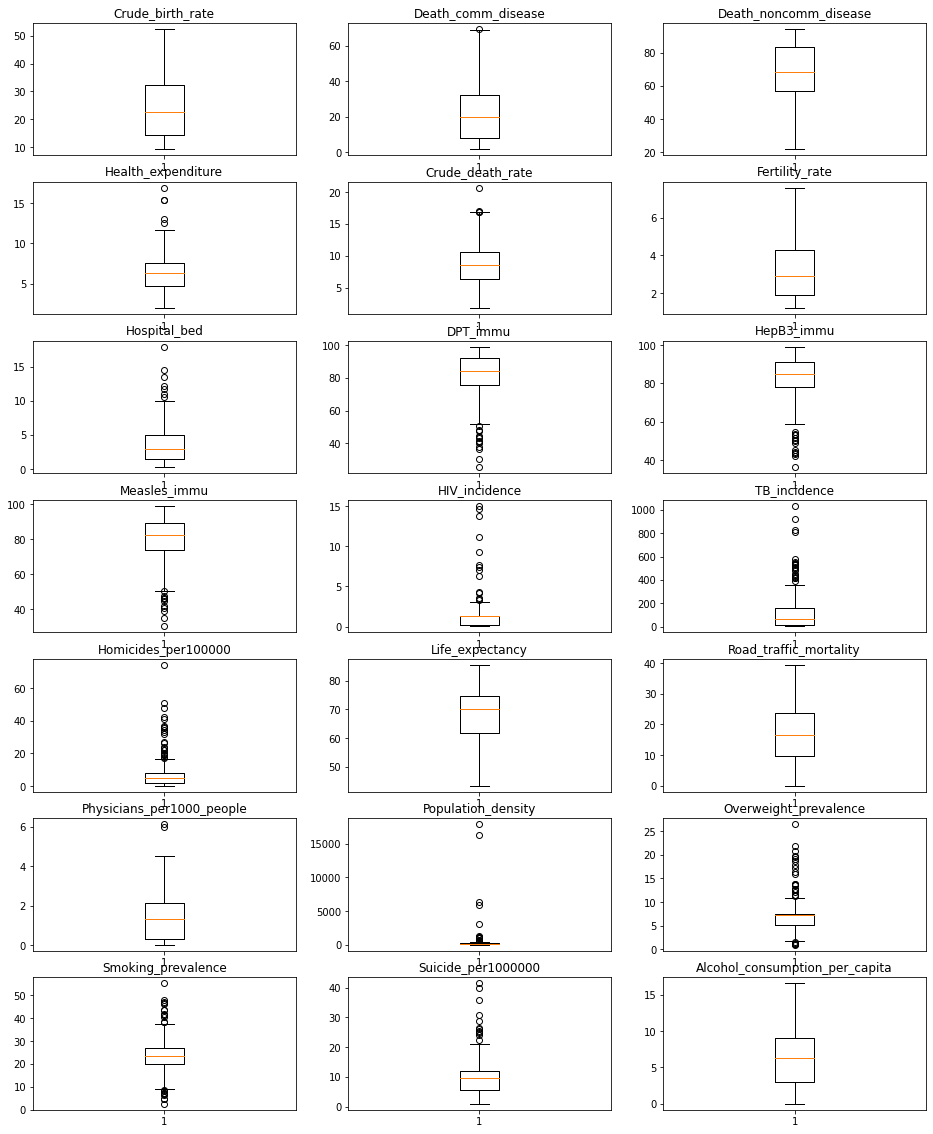

In [36]:
#check distribution of each variable in the dataframe

fig, axs = plt.subplots(7, 3, figsize=(16,20))
b = 0
for i in range(7):
    for j in range(3):
        axs[i,j].boxplot(df.iloc[:, b])
        #axs[1, 2].set_title('change whisker length')
        col_name = df.columns[b]
        axs[i,j].set_title(col_name)
        b= b + 1

plt.show()
        

In [37]:
#save the dataframe for EDA
df.to_csv("demographics_data.csv", index = False)